# Energy Trends and Modeling - ROUGH DRAFT
## Jacob Jensen
Analysis of data as recorded by the MISO energy exchange. The time frame of interest of the project is the complete 2017 - 2019 years where the time increment is broken down into per-hour units. There are two main focuses of the project. 

The first is to analyze the differences between the energy demand forecasted, actual energy demand, and the net generation of energy per hour. This analysis will help to create a higher-order polynomial regression model (higher-order being an order above 3) for the energy demand as well as another higher-order polynomial regression model for energy generation. Both models will then be compared to the current 2020 energy data to test the regression models' validity. 

*Plan of Action*

1. Look at demand, forecasted demand, and generation to see qualitatively if they are higher order polynomials (3+).
    - Yes, but look to vary greatly based on time of day. Possibly not helpful to just do overarching polynomial.
    - Try implementing a sine wave, daily oscillation with overarching polynomial fit
2. Find that higher order polynomial, possibly using curve_fit or some other package.
    - Using polyfit from numpy currently but need curve_fit to implement the sine wave in the polynomial.
3. Predict the 2020 values and see the error from the polynomials.
    - Get 2020 data as test data.
    - 
4. Refine parameters to get better estimate.
    - Try using different modeling functions
    - Use chi^2 error

The second data focus is on the breakdown of energy types received per day and see how energy generation changes per day per type of energy (e.g. How solar energy generation changes per day). This will help provide insight into the consistency of specific energy types and their overall make-up in the per-day energy composition.

*Plan of Action*

1. Get data regarding natural gas, coal, solar, nuclear, and wind.
    - Only 2019 has this breakdown in data.
2. Sum up the total energy generation in a day from each power source and divide each by the total power generated in the day.
3. Group up percentages and store into overarching dataframe
4. Possibly do a polynomial fit
    - Use np.polyfit
5. Analyze trends using plots and model analysis


In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

years = ["2017", "2018", "2019"]
yearlyData = {}

for year in years:
#Reads in all data from files and stores into dataframe.
    DataA = pd.read_csv("EIA930_BALANCE_" + year + "_Jan_Jun.csv", usecols = [0, 1, 2, 5, 6, 7], thousands = ',')
    DataB = pd.read_csv("EIA930_BALANCE_" + year + "_Jul_Dec.csv", usecols = [0, 1, 2, 5, 6, 7], thousands = ',')

    #Sorts to only look at MISO
    DataA = DataA[ DataA["Balancing Authority"] == "MISO" ]
    DataB = DataB[ DataB["Balancing Authority"] == "MISO" ]

    #Creates hour arrays beginning from 0 to the end of the year. Should be 8760
    hours = np.arange(0, 8760, 1)

    #Combine dataframes to make one data frame housing all info
    Data = DataA.append(DataB)
    Data["Total Hours"] = hours
    
    yearlyData[year] = Data
    
    
    fullData = pd.DataFrame([])
for i in yearlyData:
    yearlyData[i].dropna(inplace = True)
    fullData = fullData.append(yearlyData[i])

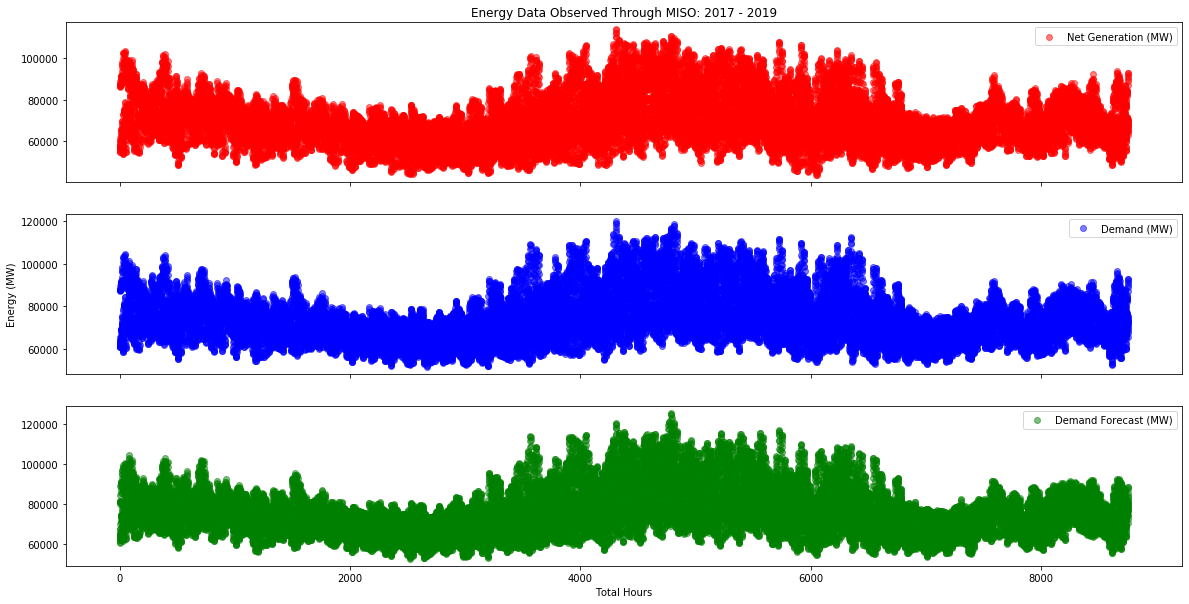

In [176]:
#Plots net gen, demand, and demand forecasted
fig, ax = plt.subplots(3,1, figsize = (20, 10), sharex = True)
ax[0].scatter(fullData["Total Hours"], fullData["Net Generation (MW)"], color = "red", alpha = 0.5)
ax[1].scatter(fullData["Total Hours"], fullData["Demand (MW)"], color = "blue", alpha = 0.5)
ax[2].scatter(fullData["Total Hours"], fullData["Demand Forecast (MW)"], color = "green", alpha = 0.5)
ax[1].set_ylabel("Energy (MW)")
ax[2].set_xlabel("Total Hours")
ax[0].set_title("Energy Data Observed Through MISO: 2017 - 2019")
ax[0].legend(["Net Generation (MW)"])
ax[1].legend(["Demand (MW)"])
ax[2].legend(["Demand Forecast (MW)"])
plt.savefig("OverallTrends")
plt.show()

In [173]:
#Loads in test data
testData = pd.read_csv("EIA930_BALANCE_2020_Jan_Jun.csv", usecols = [0, 1, 2, 5, 6, 7], thousands = ',')
testData = testData[ testData["Balancing Authority"] == "MISO" ]
hours = np.arange(0, len(testData), 1)
testData["Total Hours"] = hours

In [174]:
pfitVal = np.polyfit(yearlyData["2019"]["Total Hours"], yearlyData["2019"]["Net Generation (MW)"], 10)

fitFunc = np.poly1d(pfitVal)
predictNetGen = fitFunc(testData["Total Hours"])

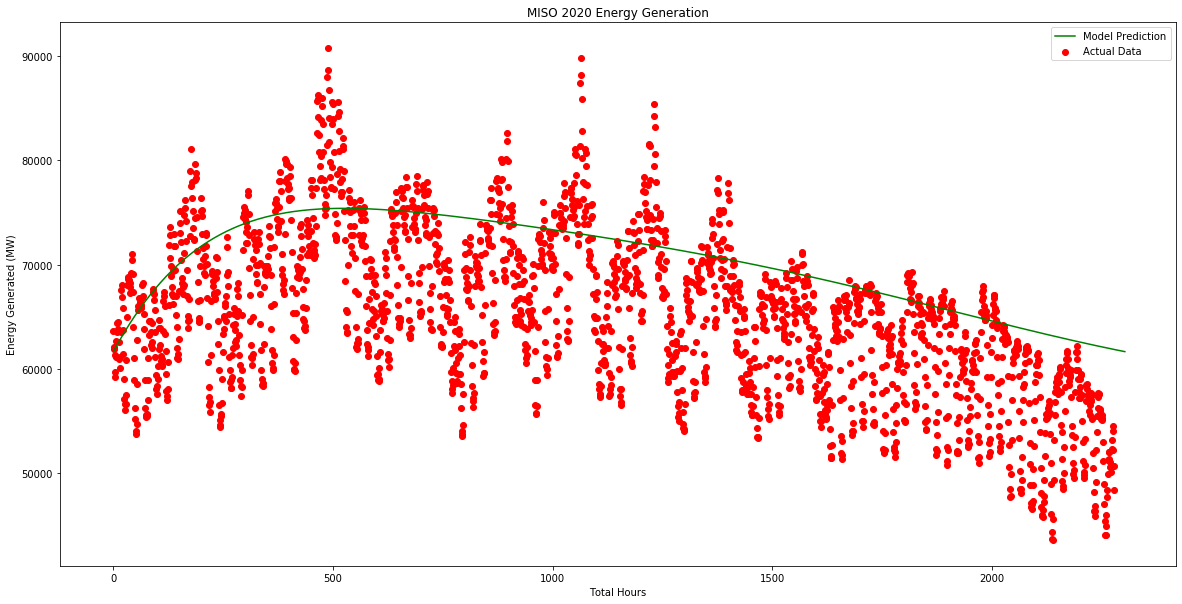

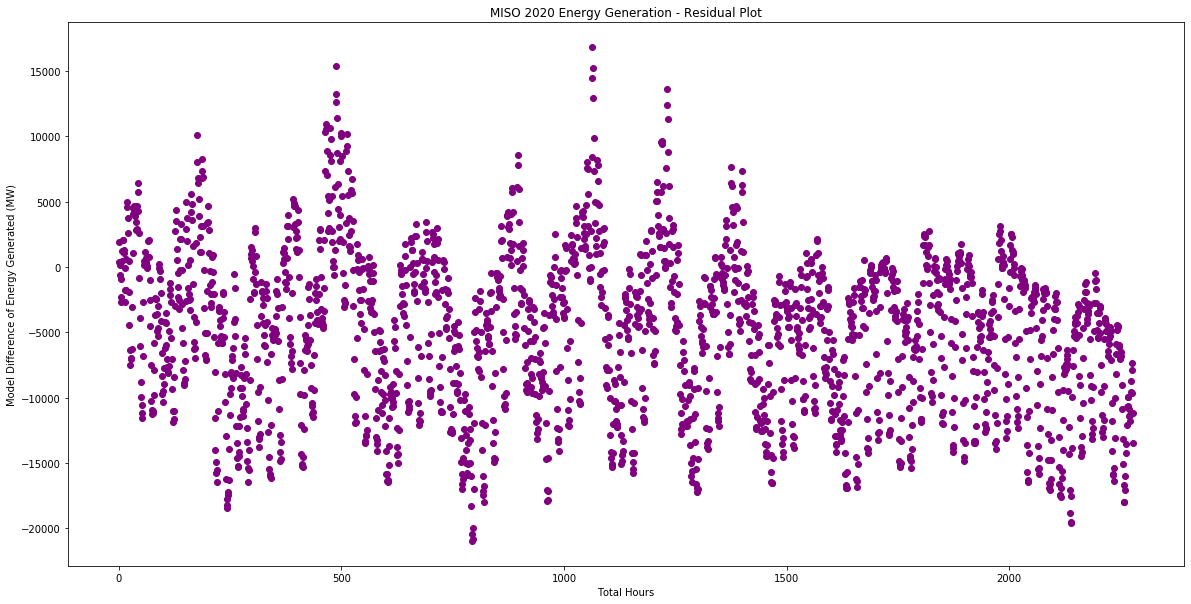

In [177]:
plt.figure(figsize = (20, 10))
plt.plot(testData["Total Hours"], predictNetGen, color = "green", label = "Model Prediction")
plt.scatter(testData["Total Hours"], testData["Net Generation (MW)"], color = "red", label = "Actual Data")
plt.title("MISO 2020 Energy Generation")
plt.xlabel("Total Hours")
plt.ylabel("Energy Generated (MW)")
plt.legend()
plt.savefig("ModelAgainstData_NetGen")
plt.show()
plt.figure(figsize = (20, 10))
plt.title("MISO 2020 Energy Generation - Residual Plot")
plt.scatter(testData["Total Hours"], testData["Net Generation (MW)"] - predictNetGen, color = "purple")
plt.xlabel("Total Hours")
plt.ylabel("Model Difference of Energy Generated (MW)")
plt.savefig("ModelAgainstData_NetGen_Residuals")
plt.show()